In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.stats import randint as sp_randint
import seaborn as sns
from numpy import mean
from numpy import std

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import auc, f1_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
pd.set_option('display.max_columns', None)

# **Dataset Pre-Processing**

In [ ]:
# Reading dataset
data = []
for i in range(1,5):
    path = '/CSV_Files/UNSW-NB15_{}.csv'  # There are 4 input csv files
    data.append(pd.read_csv(path.format(i), header = None))
all_data = pd.concat(data).reset_index(drop=True)  # Concat all to a single df

In [ ]:
# This csv file contains names of all the features
df_col = pd.read_csv('/CSV_Files/NUSW-NB15_features.csv', encoding='ISO-8859-1')

In [ ]:
# Making column names lower case, removing spaces
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())

In [ ]:
# Renaming our dataframe with proper column names
all_data.columns = df_col['Name']

In [ ]:
del df_col

In [ ]:
all_data.shape

(2540047, 49)

In [ ]:
all_data.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.93750,621800.93750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.89101,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0.0,0.0,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.043,0.014000,0.0,0.0,0.0,0,0,0.0,0.0,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.005,0.003000,0.0,0.0,0.0,0,0,0.0,0.0,0,7,9,1,1,1,1,1,NaN,0


In [ ]:
# checking for null values
all_data.isnull().sum()

Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
stime                     0
ltime                     0
sintpkt                   0
dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports

In [ ]:
all_data['attack_cat'].value_counts()

attack_cat
Generic             215481
Exploits             44525
 Fuzzers             19195
DoS                  16353
 Reconnaissance      12228
 Fuzzers              5051
Analysis              2677
Backdoor              1795
Reconnaissance        1759
 Shellcode            1288
Backdoors              534
Shellcode              223
Worms                  174
Name: count, dtype: int64

In [ ]:
# We don't have "normal" values for "attack_cat", so we must fill Null values with "normal"
all_data['attack_cat'] = all_data.attack_cat.fillna(value='normal').apply(lambda x: x.strip().lower())

In [ ]:
all_data['attack_cat'].value_counts()

attack_cat
normal            2218764
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             1795
shellcode            1511
backdoors             534
worms                 174
Name: count, dtype: int64

In [ ]:
# Replace null values in ct_flw_http_mthd with 0
all_data['ct_flw_http_mthd'] = all_data.ct_flw_http_mthd.fillna(value=0)

In [ ]:
# Even though it's a binary column, but there're values like 2 and 4
all_data['is_ftp_login'].value_counts()

is_ftp_login
0.0    1066593
1.0      43389
4.0        156
2.0         30
Name: count, dtype: int64

In [ ]:
# Replace null values in is_ftp_login with 0
all_data['is_ftp_login'] = (all_data.is_ftp_login.fillna(value=0)).astype(int)

In [ ]:
# There are no Null values in the train data anymore
all_data.isnull().sum().sum()

0

In [ ]:
# Getting name of all the columns
all_data.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload',
       'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'label'],
      dtype='object', name='Name')

In [ ]:
# Check if any null value present in dataset
all_data.isnull().sum().sum()

0

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit          

In [ ]:
# All the datatypes in our dataset
all_data.dtypes.value_counts()

int64      29
float64    11
object      9
Name: count, dtype: int64

In [ ]:
# Categorical feature names
all_data.select_dtypes(exclude=np.number).columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'ct_ftp_cmd', 'attack_cat'],
      dtype='object', name='Name')

In [ ]:
# In the research paper it was mentioned that, this is a numerical feature not a categorical
all_data['ct_ftp_cmd'].unique()

array([0, 1, 6, 2, 4, 8, 5, 3, '0', '1', ' ', '2', '4'], dtype=object)

In [ ]:
# Removing empty space and converting it to numerical
all_data['ct_ftp_cmd'] = all_data['ct_ftp_cmd'].replace(to_replace=' ', value=0).astype(int)

In [ ]:
all_data['ct_ftp_cmd'].unique()

array([0, 1, 6, 2, 4, 8, 5, 3])

In [ ]:
# Categorical feature names
all_data.select_dtypes(exclude=np.number).columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'attack_cat'],
      dtype='object', name='Name')

In [ ]:
# Numeric features names
all_data.select_dtypes(include=np.number).columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload',
       'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label'],
      dtype='object', name='Name')

In [ ]:
# see if binary columns are really binary
for col in 'is_sm_ips_ports', 'is_ftp_login':
    print(all_data[col].value_counts())
    print()

is_sm_ips_ports
0    2535852
1       4195
Name: count, dtype: int64

is_ftp_login
0    2496472
1      43389
4        156
2         30
Name: count, dtype: int64



In [ ]:
#Replace values above 1 with 1
all_data['is_ftp_login'] = np.where(all_data['is_ftp_login']>1, 1, all_data['is_ftp_login'])

In [ ]:
all_data['is_ftp_login'].value_counts()

is_ftp_login
0    2496472
1      43575
Name: count, dtype: int64

In [ ]:
all_data['service'].value_counts()

service
-           1246397
dns          781668
http         206273
ftp-data     125783
smtp          81645
ftp           49090
ssh           47160
pop3           1533
dhcp            172
ssl             142
snmp            113
radius           40
irc              31
Name: count, dtype: int64

In [ ]:
# removing all the "-" and replacing those with "None"
all_data['service'] = all_data['service'].apply(lambda x:"None" if x=="-" else x)

In [ ]:
all_data['service'].value_counts()

service
None        1246397
dns          781668
http         206273
ftp-data     125783
smtp          81645
ftp           49090
ssh           47160
pop3           1533
dhcp            172
ssl             142
snmp            113
radius           40
irc              31
Name: count, dtype: int64

In [ ]:
# In the research paper there are not 10 unique values
all_data['attack_cat'].nunique()

11

In [ ]:
all_data['attack_cat'].value_counts()

attack_cat
normal            2218764
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             1795
shellcode            1511
backdoors             534
worms                 174
Name: count, dtype: int64

In [ ]:
all_data['attack_cat'] = all_data['attack_cat'].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())

In [ ]:
all_data.shape

(2540047, 49)

In [ ]:
# creating new features
all_data['network_bytes'] = all_data['sbytes'] + all_data['dbytes']

In [ ]:
all_data.shape

(2540047, 50)

In [ ]:
# Dropping columns which are not useful for the classification
# attack_cat is for multiclass classification
# all the other columns are address related and not present in sample train data
all_data.drop(['srcip', 'sport', 'dstip', 'dsport', 'attack_cat'], axis=1, inplace=True)

In [ ]:
all_data.shape

(2540047, 45)

In [ ]:
# getting categorical and numerical columns in 2 diff lists
cat_col = ['proto', 'service', 'state']
num_col = list(set(all_data.columns) - set(cat_col))

In [ ]:
num_col.remove('label')

In [ ]:
print(num_col)

['dpkts', 'synack', 'trans_depth', 'ltime', 'stcpb', 'dloss', 'res_bdy_len', 'sintpkt', 'ct_dst_sport_ltm', 'dur', 'ct_dst_src_ltm', 'ct_src_ltm', 'dttl', 'is_sm_ips_ports', 'dload', 'tcprtt', 'dbytes', 'ct_flw_http_mthd', 'dintpkt', 'sttl', 'sloss', 'spkts', 'sjit', 'smeansz', 'ct_dst_ltm', 'ct_srv_src', 'djit', 'sbytes', 'dmeansz', 'ct_ftp_cmd', 'dtcpb', 'ct_srv_dst', 'is_ftp_login', 'sload', 'ct_src_dport_ltm', 'ackdat', 'ct_state_ttl', 'stime', 'swin', 'network_bytes', 'dwin']


In [ ]:
# Standardizing the data
scaler = StandardScaler()
scaler = scaler.fit(all_data[num_col])

In [ ]:
all_data[num_col] = scaler.transform(all_data[num_col])

In [ ]:
all_data.head()

Name,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label,network_bytes
0,udp,CON,-0.047234,-0.074595,-0.225105,-0.425902,-0.041232,-0.229334,-0.288533,dns,-0.307375,-0.432928,-0.410163,-0.335193,-1.196094,-1.192778,-0.887256,-0.887232,-0.383459,-0.580043,-0.237863,-0.089307,-0.093968,-0.212320,-1.175319,-1.17532,-0.069555,-0.054990,-0.133896,-0.126759,-0.120805,-0.040673,-0.38231,-0.197833,-0.132116,-0.111508,-0.572772,-0.183780,-0.666391,-0.475437,-0.429620,-0.419913,-0.519252,0,-0.233706
1,udp,CON,-0.044715,-0.067574,-0.224236,-0.425902,-0.041232,-0.229334,-0.288533,None,-0.310855,-0.568156,-0.383945,-0.318733,-1.196094,-1.192778,-0.887256,-0.887232,0.050991,-0.597920,-0.237863,-0.089307,-0.093383,-0.209214,-1.175319,-1.17532,-0.067041,-0.049722,-0.133896,-0.126759,-0.120805,-0.040673,-0.38231,-0.197833,-0.132116,-0.111508,-0.665051,-0.460981,-0.543872,-0.475437,-0.429620,-0.419913,-0.430429,0,-0.230611
2,udp,CON,-0.047230,-0.074347,-0.225019,-0.425902,-0.041232,-0.229334,-0.288533,dns,-0.307194,-0.429500,-0.410163,-0.335193,-1.196094,-1.192778,-0.887256,-0.887232,-0.337381,-0.559185,-0.237863,-0.089307,-0.093968,-0.212320,-1.175319,-1.17532,-0.069555,-0.054990,-0.133896,-0.126759,-0.120805,-0.040673,-0.38231,-0.197833,-0.132116,-0.111508,0.257735,-0.091380,-0.666391,-0.597313,-0.311662,-0.419913,-0.519252,0,-0.233545
3,udp,CON,-0.047223,-0.074595,-0.225105,-0.425902,-0.041232,-0.229334,-0.288533,dns,-0.307912,-0.451675,-0.410163,-0.335193,-1.196094,-1.192778,-0.887256,-0.887232,-0.383459,-0.580043,-0.237863,-0.089307,-0.093968,-0.212320,-1.175319,-1.17532,-0.069546,-0.054990,-0.133896,-0.126759,-0.120805,-0.040673,-0.38231,-0.197833,-0.132116,-0.111508,-0.295936,0.001020,-0.666391,-0.719189,-0.429620,-0.419913,-0.519252,0,-0.233706
4,udp,CON,-0.047226,-0.074347,-0.225019,-0.425902,-0.041232,-0.229334,-0.288533,dns,-0.307382,-0.435942,-0.410163,-0.335193,-1.196094,-1.192778,-0.887256,-0.887232,-0.337381,-0.559185,-0.237863,-0.089307,-0.093968,-0.212320,-1.175319,-1.17532,-0.069560,-0.054997,-0.133896,-0.126759,-0.120805,-0.040673,-0.38231,-0.197833,-0.132116,-0.111508,-0.203658,0.001020,-0.666391,-0.719189,-0.429620,-0.419913,-0.519252,0,-0.233545


In [ ]:
# Transform categorical columns using one-hot encoding
make_one_hot = pd.get_dummies(all_data[["proto", "state", "service"]])
all_data = all_data.join(make_one_hot)

In [ ]:
# Remove old catagroical columns
all_data.drop(["proto", "state", "service"], inplace=True, axis=1)

In [ ]:
all_data.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label,network_bytes,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,proto_cbt,proto_cftp,proto_chaos,proto_compaq-peer,proto_cphb,proto_cpnx,proto_crtp,proto_crudp,proto_dcn,proto_ddp,proto_ddx,proto_dgp,proto_egp,proto_eigrp,proto_emcon,proto_encap,proto_esp,proto_etherip,proto_fc,proto_fire,proto_ggp,proto_gmtp,proto_gre,proto_hmp,proto_i-nlsp,proto_iatp,proto_ib,proto_icmp,proto_idpr,proto_idpr-cmtp,proto_idrp,proto_ifmp,proto_igmp,proto_igp,proto_il,proto_ip,proto_ipcomp,proto_ipcv,proto_ipip,proto_iplt,proto_ipnip,proto_ippc,proto_ipv6,proto_ipv6-frag,proto_ipv6-no,proto_ipv6-opts,proto_ipv6-route,proto_ipx-n-ip,proto_irtp,proto_isis,proto_iso-ip,proto_iso-tp4,proto_kryptolan,proto_l2tp,proto_larp,proto_leaf-1,proto_leaf-2,proto_merit-inp,proto_mfe-nsp,proto_mhrp,proto_micp,proto_mobile,proto_mtp,proto_mux,proto_narp,proto_netblt,proto_nsfnet-igp,proto_nvp,proto_ospf,proto_pgm,proto_pim,proto_pipe,proto_pnni,proto_pri-enc,proto_prm,proto_ptp,proto_pup,proto_pvp,proto_qnx,proto_rdp,proto_rsvp,proto_rtp,proto_rvd,proto_sat-expak,proto_sat-mon,proto_sccopmce,proto_scps,proto_sctp,proto_sdrp,proto_secure-vmtp,proto_sep,proto_skip,proto_sm,proto_smp,proto_snp,proto_sprite-rpc,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_udt,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,state_ACC,state_CLO,state_CON,state_ECO,state_ECR,state_FIN,state_INT,state_MAS,state_PAR,state_REQ,state_RST,state_TST,state_TXD,state_URH,state_URN,state_no,service_None,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,-0.047234,-0.074595,-0.225105,-0.425902,-0.041232,-0.229334,-0.288533,-0.307375,-0.432928,-0.410163,-0.335193,-1.196094,-1.192778,-0.887256,-0.887232,-0.383459,-0.580043,-0.237863,-0.089307,-0.093968,-0.212320,-1.175319,-1.17532,-0.069555,-0.054990,-0.133896,-0.126759,-0.120805,-0.040673,-0.38231,-0.197833,-0.132116,-0.111508,-0.572772,-0.183780,-0.666391,-0.475437,-0.429620,-0.419913,-0.519252,0,-0.233706,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,-0.044715,-0.067574,-0.224236,-0.425902,-0.041232,-0.229334,-0.288533,-0.310855,-0.568156,-0.383945,-0.318733,-1.196094,-1.192778,-0.887256,-0.887232,0.050991,-0.597920,-0.237863,-0.089307,-0.093383,-0.209214,-1.175319,-1.17532,-0.067041,-0.049722,-0.133896,-0.126759,-0.120805,-0.040673,-0.38231,-0.197833,-0.132116,-0.111508,-0.665

In [ ]:
# Splitting data into train and test

train, test = train_test_split(all_data, test_size=0.3, random_state=16)

In [ ]:
train.to_csv('/content/drive/MyDrive/MSc/Desertation/CSV_Files/train_processed06082024.csv', index=False)

In [ ]:
test.to_csv('/content/drive/MyDrive/MSc/Desertation/CSV_Files/test_processed06082024.csv', index=False)

# **Model Training and Testing Setup**

In [5]:
train = pd.read_csv('/content/drive/MyDrive/MSc/Desertation/CSV_Files/train_processed06082024.csv')
test = pd.read_csv('/content/drive/MyDrive/MSc/Desertation/CSV_Files/test_processed06082024.csv')

In [ ]:
del all_data

In [ ]:
del one_hot

In [6]:
# creating x and y set from the dataset
x_train, y_train = train.drop(columns=['label']), train['label']
x_test, y_test = test.drop(columns=['label']), test['label']

In [7]:
del train
del test

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1778032, 205), (1778032,), (762015, 205), (762015,))

In [9]:
results_dict = {"model":[], "Accuracy":[], "Recall":[], "Precision":[], "F1-Score":[], "AUC":[], "False Positive Rate":[], "False Negative Rate":[], "False Alarm Rate":[]}
time_dict = {"model":[], "time to train":[], "time to predict":[], "total":[]}

In [12]:
#Confusion Matrix Plotting function
def plot_confusion_matrix(model, y_test, y_predictions):
  plt.rcParams['figure.figsize']=7,7
  sns.set_style("white")
  cm = confusion_matrix(y_test, y_predictions, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
  disp.plot()
  plt.show()

In [13]:
!pip install prettytable
# Import the PrettyTable class
from prettytable import PrettyTable

def table_generation(results_dict):
  x = PrettyTable()
  x.field_names = ["Model", "Accuracy", "Recall", "Precision", "F1-Score", "AUC", "False Positive Rate", "False Negative Rate", "False Alarm Rate"]

  for i in range(len(results_dict["model"])):
    x.add_row([results_dict["model"][i], results_dict["Accuracy"][i], results_dict["Recall"][i], results_dict["Precision"][i], results_dict["F1-Score"][i], results_dict["AUC"][i], results_dict["False Positive Rate"][i], results_dict["False Negative Rate"][i], results_dict["False Alarm Rate"][i]])
    print(x)

In [14]:
#Function to print time results in a table
def time_table_generation(time_dict):
  x = PrettyTable()
  x.field_names = ["Model", "Time to Train", "Time to Predict", "Total"]

  for i in range(len(time_dict["model"])):
    x.add_row([time_dict["model"][i], time_dict["time to train"][i], time_dict["time to predict"][i], time_dict["total"][i]])
    print(x)

In [15]:
#Function to calculate metrics and print them
def metrics_calculation(model, y_predictions, y_test):

  # Calculate metrics
  accuracy = accuracy_score(y_test, y_predictions)
  recall = recall_score(y_test, y_predictions)
  precision = precision_score(y_test, y_predictions)
  f1s = f1_score(y_test, y_predictions)
  auc = roc_auc_score(y_test, y_predictions)

  # Calculate FPR, FNR and FAR
  tn, fp, fn, tp = confusion_matrix(y_test, y_predictions).ravel()
  FPR = fp / (fp + tn)
  FNR = fn / (fn + tp)
  FAR = (FPR+FNR)/2

  model_name = str(model)
  if '(random_state=10)' in model_name:
    model_name = model_name.replace('(random_state=10)', '')

  #print the results
  print("Model: "+ str(model_name))
  print("Accuracy: "+ "{:.2%}".format(accuracy))
  print("Recall: "+ "{:.2%}".format(recall))
  print("Precision: "+ "{:.2%}".format(precision))
  print("F1-Score: "+ "{:.2%}".format(f1s))
  print("AUC: "+ "{:.2%}".format(auc))
  print("False Positive Rate: "+ "{:.2%}".format(FPR))
  print("False Negative Rate: "+ "{:.2%}".format(FNR))
  print("False Alarm Rate: "+ "{:.2%}".format(FAR))

  #Adding results to results dictionary
  results_dict["model"].append(model_name)
  results_dict["Accuracy"].append("{:.2%}".format(accuracy))
  results_dict["Recall"].append("{:.2%}".format(recall))
  results_dict["Precision"].append("{:.2%}".format(precision))
  results_dict["F1-Score"].append("{:.2%}".format(f1s))
  results_dict["AUC"].append("{:.2%}".format(auc))
  results_dict["False Positive Rate"].append("{:.2%}".format(FPR))
  results_dict["False Negative Rate"].append("{:.2%}".format(FNR))
  results_dict["False Alarm Rate"].append("{:.2%}".format(FAR))

In [16]:
#Function to calculate time
def time_calculation(model, start, end_train, end_predict):

  #print time results
  print("time to train: "+ "{:.1f}".format(end_train-start)+" s")
  print("time to predict: "+"{:.1f}".format(end_predict-end_train)+" s")
  print("total: "+"{:.1f}".format(end_predict-start)+" s")

  model_name = str(model)
  if '(random_state=10)' in model_name:
    model_name = model_name.replace('(random_state=10)', '')

  #Adding results to time dictionary
  time_dict["model"].append(model_name)
  time_dict["time to train"].append("{:.1f}".format(end_train-start)+" s")
  time_dict["time to predict"].append("{:.1f}".format(end_predict-end_train)+" s")
  time_dict["total"].append("{:.1f}".format(end_predict-start)+" s")


In [17]:
#Function to plot ROC Curve
def plot_roc_curve(y_predictions, y_test):

  fpr, tpr, thresholds = roc_curve(y_test, y_predictions)
  auc = roc_auc_score(y_test, y_predictions)
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.show()


In [18]:
#Function to perform cross validation
def cross_validation(model, x_train, y_train):
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
  # define metrics for evaluating
  metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

  # evaluate model
  results_cv = cross_validate(model, x_train, y_train, cv=cv, scoring=metrics, verbose=3)

  # print results of CV
  print("Cross Validation Results:")
  print(results_cv)
  print("Mean Accuracy: "+ "{:.2%}".format(results_cv['test_accuracy'].mean()))
  print("Mean Recall: "+ "{:.2%}".format(results_cv['test_recall'].mean()))
  print("Mean Precision: "+ "{:.2%}".format(results_cv['test_precision'].mean()))
  print("Mean F1-Score: "+ "{:.2%}".format(results_cv['test_f1'].mean()))
  print("Mean AUC: "+ "{:.2%}".format(results_cv['test_roc_auc'].mean()))
  print("Mean Time to Train: "+"{:.1f}".format(results_cv['fit_time'].mean())+" s")
  print("Mean Time to Predict: "+"{:.1f}".format(results_cv['score_time'].mean())+" s")
  print("Mean Total Time: "+"{:.1f}".format(results_cv['score_time'].mean()+results_cv['fit_time'].mean())+" s")


In [19]:
def model_implementation(model, x_train, y_train, x_test, y_test):
  """

  Args:
    model: type of classifier to use for training and testing
    x_train: training data
    y_train: training labels
    x_test: test data
    y_test: test labels
  """
  #This function performs the model training, testing and prints the results of the metrics
  start = time.time() # measure starting time for training
  model = model.fit(x_train, y_train) # Fit the model
  end_train = time.time() # measure end of training time
  y_predictions = model.predict(x_test) # These are the predictions from the test data.
  end_predict = time.time() # measure end of prediction time

  # Calculate the metrics
  metrics_calculation(model, y_predictions, y_test)

  # Calculate the time
  time_calculation(model, start, end_train, end_predict)

  # Confusion Matrix
  plot_confusion_matrix(model, y_test, y_predictions)

  # Plot ROC Curve
  plot_roc_curve(y_predictions, y_test)

  # Perform 10-folds cross evaluation
  cross_validation(model, x_train, y_train)

# **ML Modeling and Testing (No feature selection used)**

In [ ]:
#Implementing Random Forests using default parameters
model = RandomForestClassifier(random_state=10)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

Model: RandomForestClassifier
Accuracy: 99.54%
Recall: 98.05%
Precision: 98.30%
F1-Score: 98.17%
AUC: 98.90%
False Positive Rate: 0.25%
False Negative Rate: 1.95%
False Alarm Rate: 1.10%
time to train: 337.1 s
time to predict: 8.5 s
total: 345.6 s


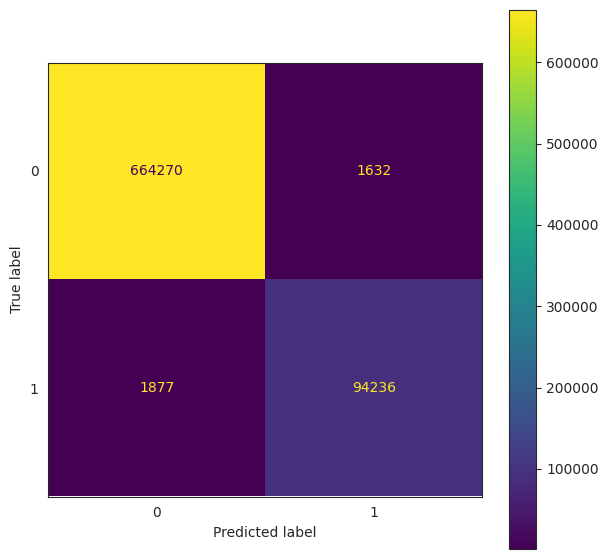

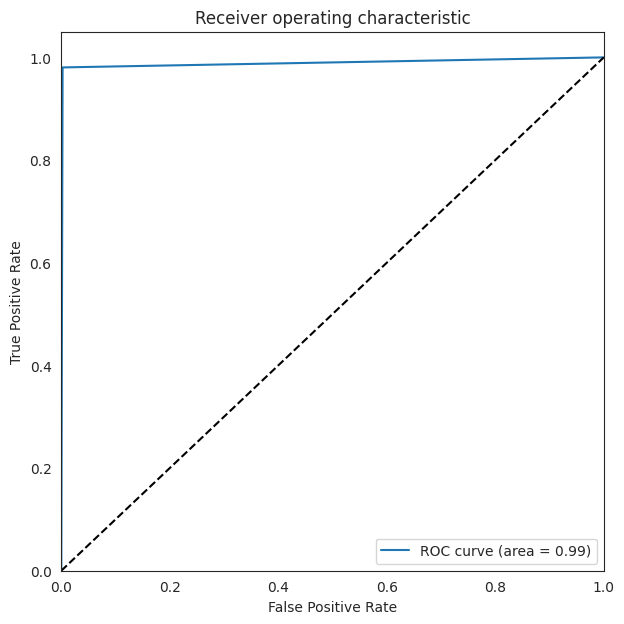

[CV] END  accuracy: (test=0.995) f1: (test=0.982) precision: (test=0.983) recall: (test=0.981) roc_auc: (test=1.000) total time= 4.6min
[CV] END  accuracy: (test=0.995) f1: (test=0.980) precision: (test=0.982) recall: (test=0.979) roc_auc: (test=1.000) total time= 4.4min
[CV] END  accuracy: (test=0.995) f1: (test=0.982) precision: (test=0.983) recall: (test=0.980) roc_auc: (test=1.000) total time= 3.9min
[CV] END  accuracy: (test=0.995) f1: (test=0.981) precision: (test=0.984) recall: (test=0.979) roc_auc: (test=1.000) total time= 3.4min
[CV] END  accuracy: (test=0.995) f1: (test=0.980) precision: (test=0.982) recall: (test=0.978) roc_auc: (test=1.000) total time= 3.5min
Cross Validation Results:
{'fit_time': array([267.0898757 , 253.18626976, 228.51438856, 194.34098363,
       200.13133764]), 'score_time': array([8.34547853, 8.4240365 , 8.24079633, 8.49941897, 8.45276308]), 'test_accuracy': array([0.99537692, 0.99504228, 0.99533754, 0.99526442, 0.99492697]), 'test_precision': array([0

In [ ]:
#Run model implementation function
model_implementation(model, x_train, y_train, x_test, y_test)

In [ ]:
model = DecisionTreeClassifier(random_state=10)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

Model: DecisionTreeClassifier
Accuracy: 99.48%
Recall: 97.92%
Precision: 97.92%
F1-Score: 97.92%
AUC: 98.81%
False Positive Rate: 0.30%
False Negative Rate: 2.08%
False Alarm Rate: 1.19%
time to train: 22.2 s
time to predict: 0.5 s
total: 22.7 s


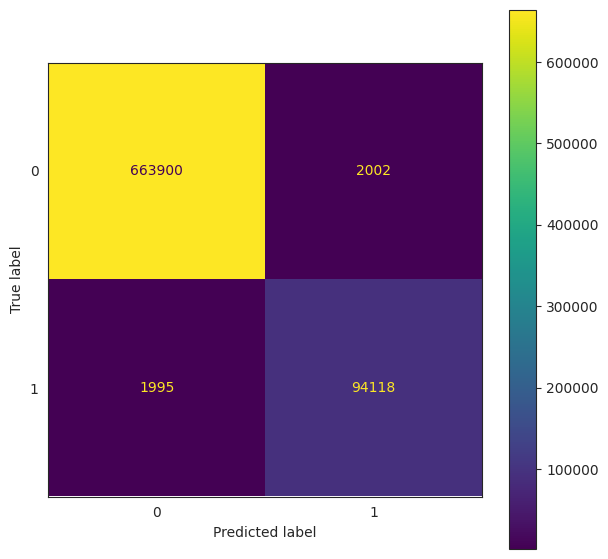

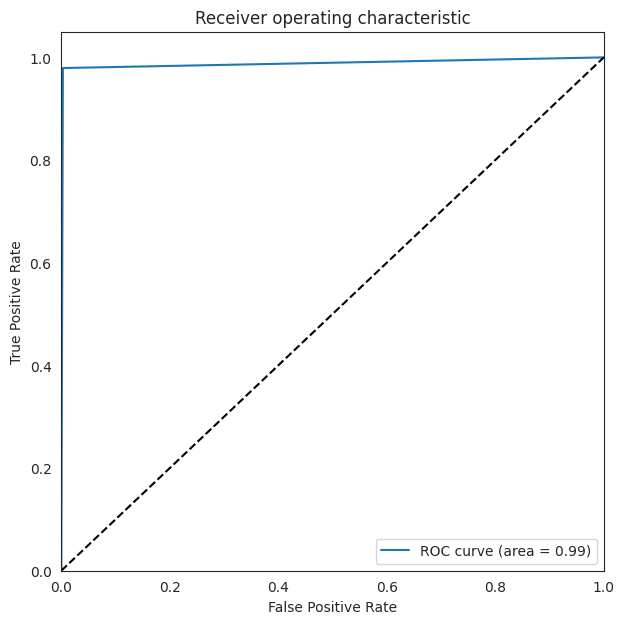

[CV] END  accuracy: (test=0.994) f1: (test=0.978) precision: (test=0.977) recall: (test=0.979) roc_auc: (test=0.988) total time=  19.3s
[CV] END  accuracy: (test=0.994) f1: (test=0.977) precision: (test=0.977) recall: (test=0.976) roc_auc: (test=0.986) total time=  19.0s
[CV] END  accuracy: (test=0.994) f1: (test=0.977) precision: (test=0.977) recall: (test=0.977) roc_auc: (test=0.987) total time=  19.2s
[CV] END  accuracy: (test=0.994) f1: (test=0.978) precision: (test=0.979) recall: (test=0.978) roc_auc: (test=0.987) total time=  18.8s
[CV] END  accuracy: (test=0.994) f1: (test=0.978) precision: (test=0.978) recall: (test=0.977) roc_auc: (test=0.987) total time=  19.2s
Cross Validation Results:
{'fit_time': array([17.8153069 , 17.52763629, 17.7293148 , 17.37208247, 17.76285982]), 'score_time': array([1.45580816, 1.43093538, 1.4451344 , 1.44776487, 1.45364857]), 'test_accuracy': array([0.9943955 , 0.99410585, 0.99422113, 0.9944461 , 0.9943758 ]), 'test_precision': array([0.9770143 , 0

In [ ]:
model_implementation(model, x_train, y_train, x_test, y_test)

In [ ]:
model = KNeighborsClassifier()
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Model: KNeighborsClassifier()
Accuracy: 99.05%
Recall: 96.00%
Precision: 96.41%
F1-Score: 96.21%
AUC: 97.74%
False Positive Rate: 0.52%
False Negative Rate: 4.00%
False Alarm Rate: 2.26%
time to train: 3.7 s
time to predict: 490.5 s
total: 494.2 s


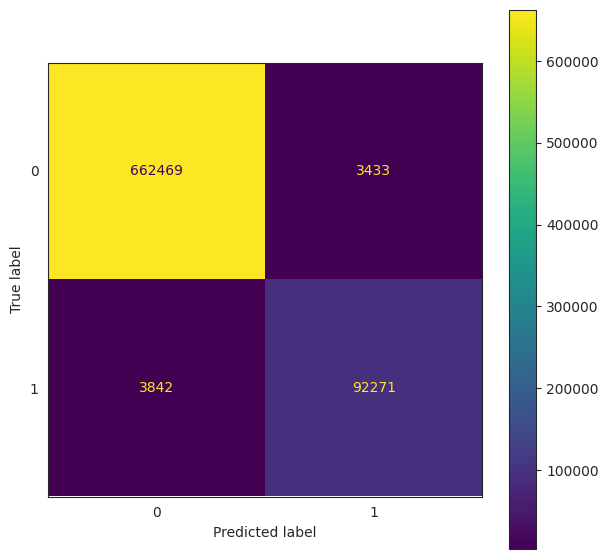

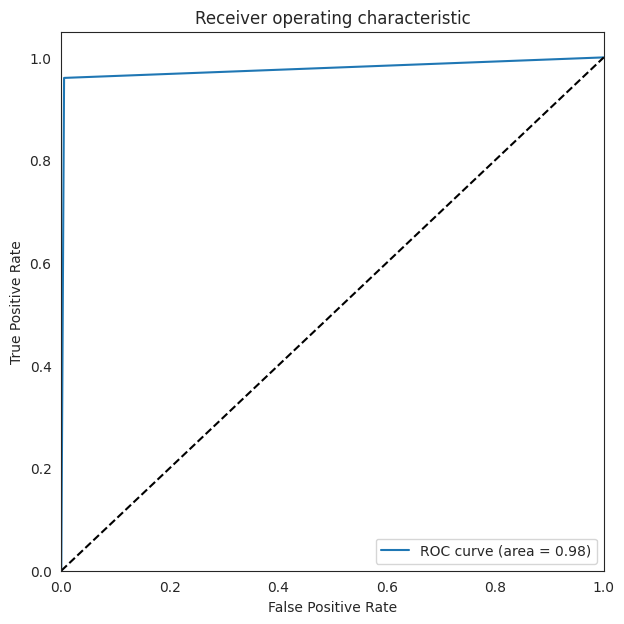

[CV] END  accuracy: (test=0.990) f1: (test=0.962) precision: (test=0.963) recall: (test=0.962) roc_auc: (test=0.997) total time= 6.1min
[CV] END  accuracy: (test=0.990) f1: (test=0.961) precision: (test=0.963) recall: (test=0.960) roc_auc: (test=0.997) total time= 6.1min
[CV] END  accuracy: (test=0.990) f1: (test=0.961) precision: (test=0.963) recall: (test=0.960) roc_auc: (test=0.997) total time= 6.1min
[CV] END  accuracy: (test=0.990) f1: (test=0.962) precision: (test=0.965) recall: (test=0.959) roc_auc: (test=0.997) total time= 6.1min
[CV] END  accuracy: (test=0.990) f1: (test=0.961) precision: (test=0.963) recall: (test=0.958) roc_auc: (test=0.997) total time= 6.1min
Cross Validation Results:
{'fit_time': array([4.00761223, 3.99937749, 3.81007576, 3.78846717, 3.78632164]), 'score_time': array([363.19884777, 364.14847112, 364.83578205, 364.43914366,
       361.18576765]), 'test_accuracy': array([0.99047825, 0.99023922, 0.99025607, 0.99048385, 0.99011828]), 'test_precision': array([0

In [ ]:
model_implementation(model, x_train, y_train, x_test, y_test)

In [ ]:
model = LinearSVC(random_state=10)
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': 'warn',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 10,
 'tol': 0.0001,
 'verbose': 0}

Model: LinearSVC
Accuracy: 98.90%
Recall: 97.94%
Precision: 93.61%
F1-Score: 95.73%
AUC: 98.49%
False Positive Rate: 0.96%
False Negative Rate: 2.06%
False Alarm Rate: 1.51%
time to train: 499.0 s
time to predict: 1.0 s
total: 500.0 s


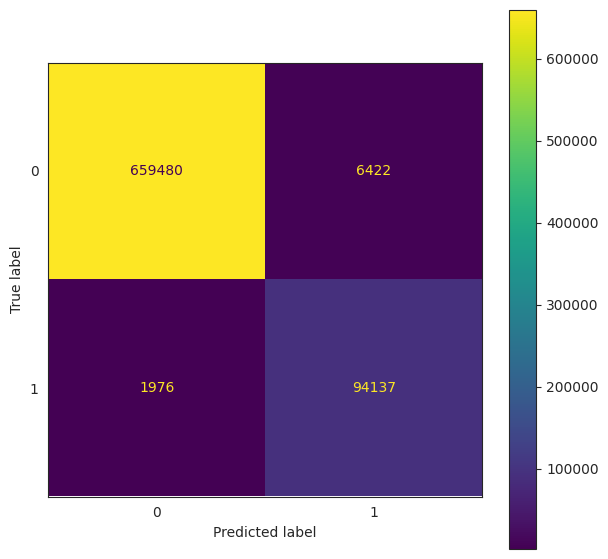

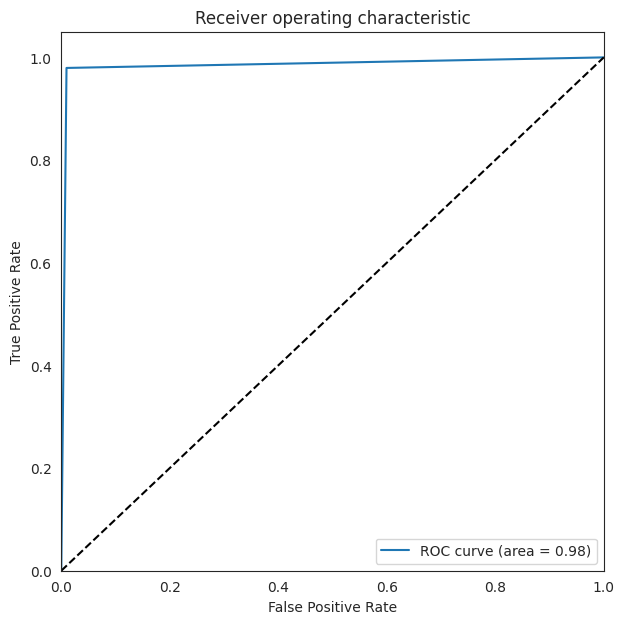

[CV] END  accuracy: (test=0.989) f1: (test=0.957) precision: (test=0.933) recall: (test=0.982) roc_auc: (test=0.999) total time= 4.9min
[CV] END  accuracy: (test=0.989) f1: (test=0.958) precision: (test=0.940) recall: (test=0.977) roc_auc: (test=0.999) total time= 4.8min
[CV] END  accuracy: (test=0.989) f1: (test=0.958) precision: (test=0.936) recall: (test=0.980) roc_auc: (test=0.999) total time= 5.2min
[CV] END  accuracy: (test=0.990) f1: (test=0.960) precision: (test=0.939) recall: (test=0.981) roc_auc: (test=0.999) total time= 5.2min
[CV] END  accuracy: (test=0.989) f1: (test=0.958) precision: (test=0.937) recall: (test=0.980) roc_auc: (test=0.999) total time= 7.3min
Cross Validation Results:
{'fit_time': array([291.77340055, 288.42754936, 308.95151019, 310.19308853,
       435.39732361]), 'score_time': array([1.97471881, 1.96330094, 1.94465303, 1.95859623, 2.03213429]), 'test_accuracy': array([0.98885849, 0.98917907, 0.98905811, 0.98956711, 0.9891003 ]), 'test_precision': array([0

In [ ]:
model_implementation(model, x_train, y_train, x_test, y_test)

In [ ]:
table_generation(results_dict)

+------------------------+----------+--------+-----------+----------+--------+---------------------+---------------------+------------------+
|         Model          | Accuracy | Recall | Precision | F1-Score |  AUC   | False Positive Rate | False Negative Rate | False Alarm Rate |
+------------------------+----------+--------+-----------+----------+--------+---------------------+---------------------+------------------+
| RandomForestClassifier |  99.54%  | 98.05% |   98.30%  |  98.17%  | 98.90% |        0.25%        |        1.95%        |      1.10%       |
+------------------------+----------+--------+-----------+----------+--------+---------------------+---------------------+------------------+
+------------------------+----------+--------+-----------+----------+--------+---------------------+---------------------+------------------+
|         Model          | Accuracy | Recall | Precision | F1-Score |  AUC   | False Positive Rate | False Negative Rate | False Alarm Rate |
+-----

In [ ]:
time_table_generation(time_dict)

+------------------------+---------------+-----------------+---------+
|         Model          | Time to Train | Time to Predict |  Total  |
+------------------------+---------------+-----------------+---------+
| RandomForestClassifier |    337.1 s    |      8.5 s      | 345.6 s |
+------------------------+---------------+-----------------+---------+
+------------------------+---------------+-----------------+---------+
|         Model          | Time to Train | Time to Predict |  Total  |
+------------------------+---------------+-----------------+---------+
| RandomForestClassifier |    337.1 s    |      8.5 s      | 345.6 s |
| DecisionTreeClassifier |     22.2 s    |      0.5 s      |  22.7 s |
+------------------------+---------------+-----------------+---------+
+------------------------+---------------+-----------------+---------+
|         Model          | Time to Train | Time to Predict |  Total  |
+------------------------+---------------+-----------------+---------+
| Rand

# **Feature Selection**

In [ ]:
del model

In [22]:
#Implementation of Feature selection using Extra Trees Classifier
model_default = ExtraTreesClassifier(random_state=10)
model_default.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [23]:
model_default.fit(x_train, y_train)
y_predictions = model_default.predict(x_test)

#Calculate metrics
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions)
precision = precision_score(y_test, y_predictions)
f1s = f1_score(y_test, y_predictions)
auc = roc_auc_score(y_test, y_predictions)

tn, fp, fn, tp = confusion_matrix(y_test, y_predictions).ravel()
FPR = fp / (fp + tn)  # False positive rate
FNR = fn / (fn + tp)  # False negetive rate
FAR = (FPR+FNR)/2  # False alarm rate

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("AUC: "+ "{:.2%}".format(auc))
print("False Positive Rate: "+ "{:.2%}".format(FPR))
print("False Negative Rate: "+ "{:.2%}".format(FNR))
print("False Alarm Rate: "+ "{:.2%}".format(FAR))

Accuracy: 99.51%
Recall: 97.86%
Precision: 98.26%
F1-Score: 98.06%
AUC: 98.81%
False Positive Rate: 0.25%
False Negative Rate: 2.14%
False Alarm Rate: 1.19%


In [ ]:
#Implementation of Feature selection using Extra Trees Classifier with hypertuned parameters
model = ExtraTreesClassifier(n_estimators=100, max_features=40, min_samples_split=2,random_state=10)
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 40,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [ ]:
model.fit(x_train, y_train) # fitting ETC to the training dataset

# Extract the features according to their importance from the trained model
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)

In [ ]:
#Perform model testing on the testing dataset
y_predictions = model.predict(x_test)

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions)
precision = precision_score(y_test, y_predictions)
f1s = f1_score(y_test, y_predictions)
auc = roc_auc_score(y_test, y_predictions)

tn, fp, fn, tp = confusion_matrix(y_test, y_predictions).ravel()
FPR = fp / (fp + tn)  # False positive rate
FNR = fn / (fn + tp)  # False negetive rate
FAR = (FPR+FNR)/2  # False alarm rate

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("AUC: "+ "{:.2%}".format(auc))
print("False Positive Rate: "+ "{:.2%}".format(FPR))
print("False Negative Rate: "+ "{:.2%}".format(FNR))
print("False Alarm Rate: "+ "{:.2%}".format(FAR))

Accuracy: 99.55%
Recall: 98.07%
Precision: 98.36%
F1-Score: 98.21%
AUC: 98.92%
False Positive Rate: 0.24%
False Negative Rate: 1.93%
False Alarm Rate: 1.08%


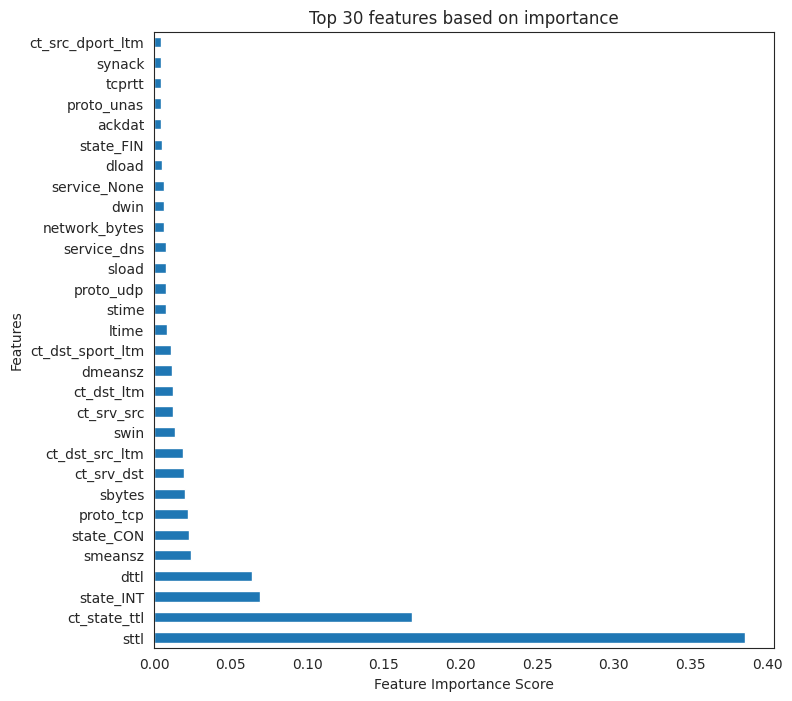

In [ ]:
feat_importances.nlargest(30).plot(kind='barh', figsize=(8,8))
plt.title('Top 30 features based on importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
features_selection = feat_importances[feat_importances > 0.0077].index
features_selection

Index(['sttl', 'ct_state_ttl', 'state_INT', 'dttl', 'smeansz', 'state_CON',
       'proto_tcp', 'sbytes', 'ct_srv_dst', 'ct_dst_src_ltm', 'swin',
       'ct_srv_src', 'ct_dst_ltm', 'dmeansz', 'ct_dst_sport_ltm', 'ltime',
       'stime'],
      dtype='object')

In [ ]:
del x_train_new
del x_test_new

In [ ]:
#Building new datset using selected features
x_train_new = x_train[features_selection]
x_test_new = x_test[features_selection]

In [ ]:
del x_train
del x_test

In [ ]:
x_train_new.shape, x_test_new.shape

((1778032, 17), (762015, 17))

# **ML Modeling and Testing (With feature selection)**

In [ ]:
del model

In [ ]:
model = RandomForestClassifier(random_state=10)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

Model: RandomForestClassifier
Accuracy: 99.66%
Recall: 98.73%
Precision: 98.61%
F1-Score: 98.67%
AUC: 99.26%
False Positive Rate: 0.20%
False Negative Rate: 1.27%
False Alarm Rate: 0.74%
time to train: 116.7 s
time to predict: 4.6 s
total: 121.3 s


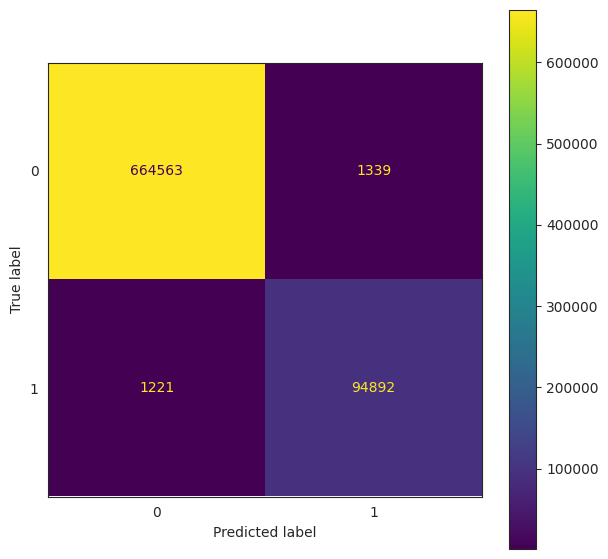

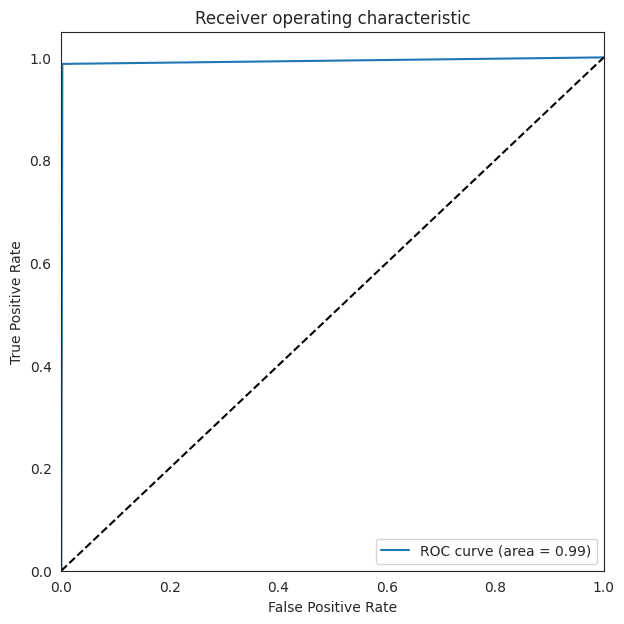

[CV] END  accuracy: (test=0.996) f1: (test=0.986) precision: (test=0.985) recall: (test=0.987) roc_auc: (test=1.000) total time= 1.6min
[CV] END  accuracy: (test=0.997) f1: (test=0.986) precision: (test=0.985) recall: (test=0.987) roc_auc: (test=1.000) total time= 1.4min
[CV] END  accuracy: (test=0.997) f1: (test=0.986) precision: (test=0.986) recall: (test=0.987) roc_auc: (test=1.000) total time= 1.6min
[CV] END  accuracy: (test=0.996) f1: (test=0.986) precision: (test=0.987) recall: (test=0.986) roc_auc: (test=1.000) total time= 1.6min
[CV] END  accuracy: (test=0.996) f1: (test=0.986) precision: (test=0.985) recall: (test=0.986) roc_auc: (test=1.000) total time= 1.6min
Cross Validation Results:
{'fit_time': array([90.38155389, 80.83561325, 92.39861727, 92.63602996, 92.60783815]), 'score_time': array([4.95854998, 4.91253328, 4.7949121 , 4.80433607, 4.81185293]), 'test_accuracy': array([0.99643708, 0.99652144, 0.99651018, 0.99648206, 0.99635833]), 'test_precision': array([0.98475954, 0

In [ ]:
model_implementation(model, x_train_new, y_train, x_test_new, y_test)

In [ ]:
del model

In [ ]:
model = DecisionTreeClassifier(random_state=10)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

Model: DecisionTreeClassifier
Accuracy: 99.60%
Recall: 98.35%
Precision: 98.47%
F1-Score: 98.41%
AUC: 99.07%
False Positive Rate: 0.22%
False Negative Rate: 1.65%
False Alarm Rate: 0.93%
time to train: 3.4 s
time to predict: 0.1 s
total: 3.5 s


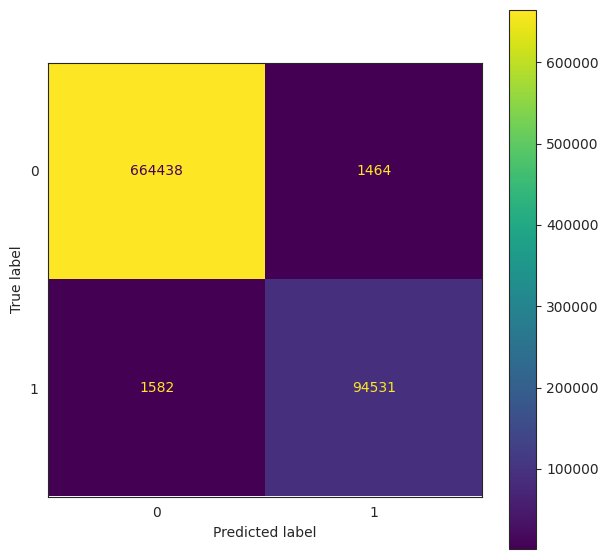

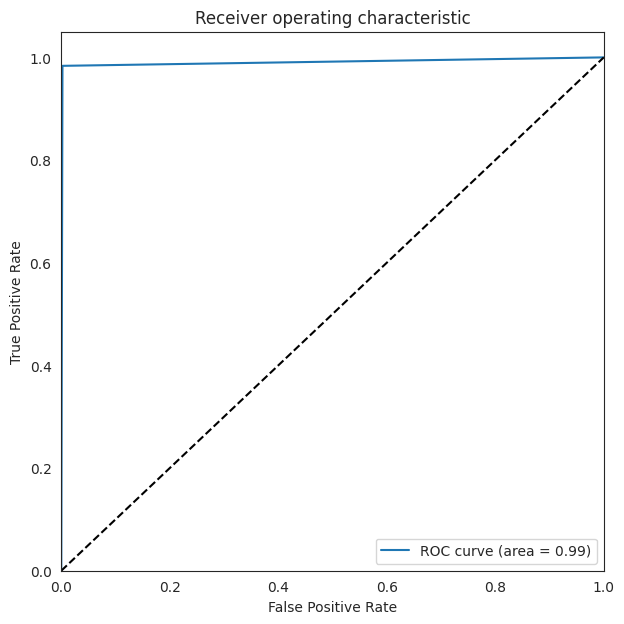

[CV] END  accuracy: (test=0.996) f1: (test=0.983) precision: (test=0.983) recall: (test=0.983) roc_auc: (test=0.990) total time=   3.9s
[CV] END  accuracy: (test=0.996) f1: (test=0.984) precision: (test=0.984) recall: (test=0.983) roc_auc: (test=0.991) total time=   3.6s
[CV] END  accuracy: (test=0.996) f1: (test=0.984) precision: (test=0.984) recall: (test=0.984) roc_auc: (test=0.991) total time=   3.8s
[CV] END  accuracy: (test=0.996) f1: (test=0.983) precision: (test=0.985) recall: (test=0.981) roc_auc: (test=0.989) total time=   3.7s
[CV] END  accuracy: (test=0.996) f1: (test=0.983) precision: (test=0.984) recall: (test=0.982) roc_auc: (test=0.990) total time=   3.7s
Cross Validation Results:
{'fit_time': array([2.87239408, 2.66710329, 2.75298667, 2.75528193, 2.75648475]), 'score_time': array([0.99422455, 0.97002864, 1.02727246, 0.99042892, 0.97277808]), 'test_accuracy': array([0.99566375, 0.9958831 , 0.99592527, 0.99568624, 0.99559625]), 'test_precision': array([0.98279384, 0.9842

In [ ]:
model_implementation(model, x_train_new, y_train, x_test_new, y_test)

In [ ]:
del model

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Model: KNeighborsClassifier()
Accuracy: 99.33%
Recall: 97.22%
Precision: 97.43%
F1-Score: 97.32%
AUC: 98.42%
False Positive Rate: 0.37%
False Negative Rate: 2.78%
False Alarm Rate: 1.58%
time to train: 0.5 s
time to predict: 172.2 s
total: 172.7 s


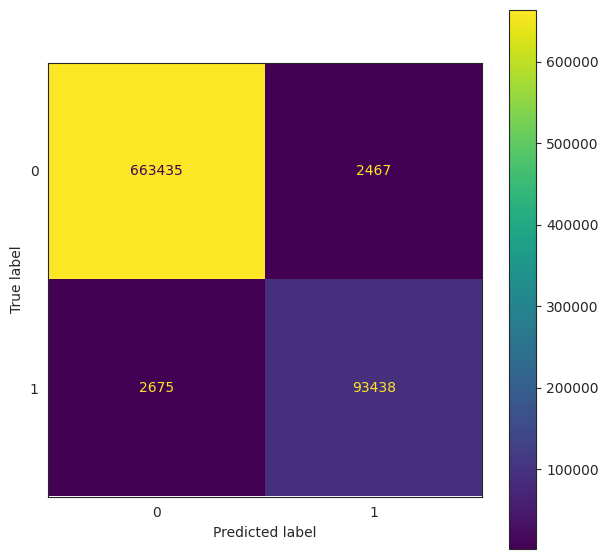

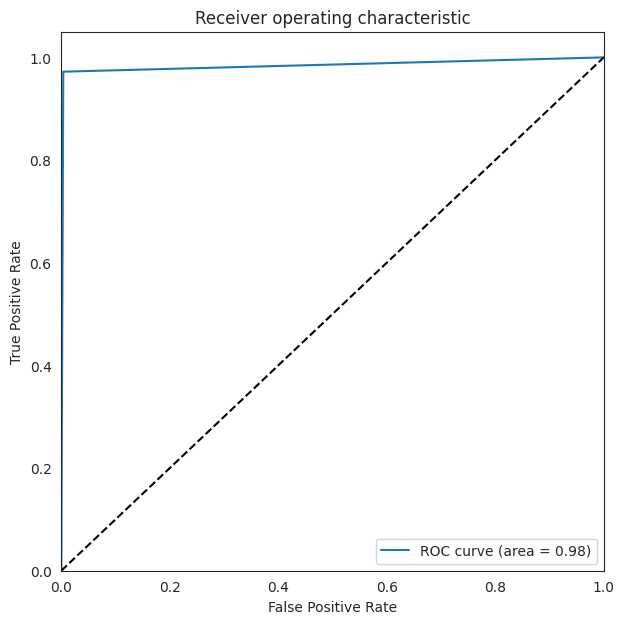

[CV] END  accuracy: (test=0.993) f1: (test=0.972) precision: (test=0.973) recall: (test=0.971) roc_auc: (test=0.997) total time= 2.0min
[CV] END  accuracy: (test=0.993) f1: (test=0.972) precision: (test=0.973) recall: (test=0.971) roc_auc: (test=0.997) total time= 2.0min
[CV] END  accuracy: (test=0.993) f1: (test=0.972) precision: (test=0.973) recall: (test=0.972) roc_auc: (test=0.997) total time= 2.0min
[CV] END  accuracy: (test=0.993) f1: (test=0.972) precision: (test=0.974) recall: (test=0.970) roc_auc: (test=0.997) total time= 2.1min
[CV] END  accuracy: (test=0.993) f1: (test=0.972) precision: (test=0.973) recall: (test=0.970) roc_auc: (test=0.997) total time= 2.1min
Cross Validation Results:
{'fit_time': array([0.53201962, 0.4362514 , 0.54061532, 0.54047656, 0.5734942 ]), 'score_time': array([122.26029587, 121.88558674, 121.87295938, 125.79657841,
       124.36431527]), 'test_accuracy': array([0.99294165, 0.99287134, 0.99303161, 0.99298943, 0.99285445]), 'test_precision': array([0

In [ ]:
model_implementation(model, x_train_new, y_train, x_test_new, y_test)

In [ ]:
del model

In [ ]:
model = LinearSVC(random_state=10)
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': 'warn',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 10,
 'tol': 0.0001,
 'verbose': 0}

Model: LinearSVC
Accuracy: 98.41%
Recall: 97.87%
Precision: 90.36%
F1-Score: 93.96%
AUC: 98.18%
False Positive Rate: 1.51%
False Negative Rate: 2.13%
False Alarm Rate: 1.82%
time to train: 193.0 s
time to predict: 0.1 s
total: 193.1 s


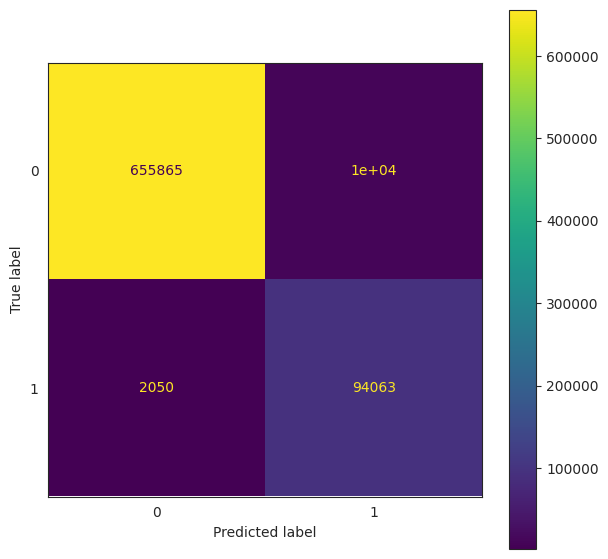

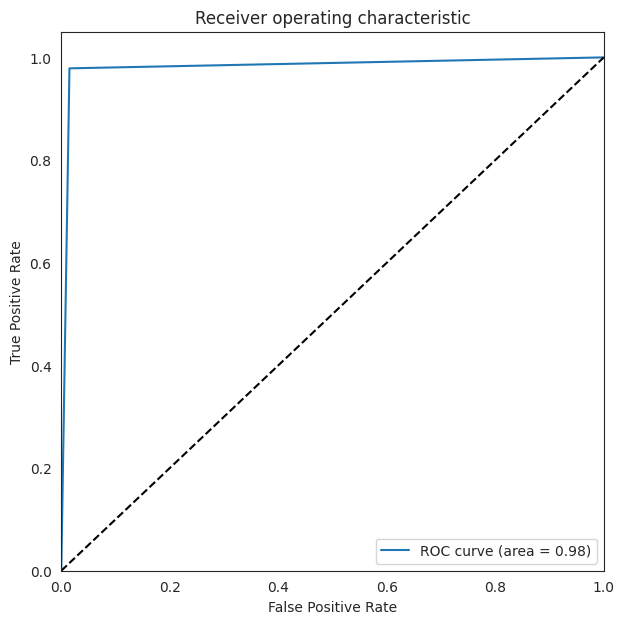

[CV] END  accuracy: (test=0.984) f1: (test=0.939) precision: (test=0.902) recall: (test=0.978) roc_auc: (test=0.998) total time= 2.4min
[CV] END  accuracy: (test=0.984) f1: (test=0.940) precision: (test=0.903) recall: (test=0.979) roc_auc: (test=0.998) total time= 2.3min
[CV] END  accuracy: (test=0.984) f1: (test=0.939) precision: (test=0.903) recall: (test=0.979) roc_auc: (test=0.998) total time= 2.4min
[CV] END  accuracy: (test=0.985) f1: (test=0.942) precision: (test=0.907) recall: (test=0.979) roc_auc: (test=0.998) total time= 2.3min
[CV] END  accuracy: (test=0.984) f1: (test=0.941) precision: (test=0.904) recall: (test=0.980) roc_auc: (test=0.998) total time= 2.3min
Cross Validation Results:
{'fit_time': array([145.62141895, 137.66183949, 139.9669435 , 138.96399188,
       133.81616211]), 'score_time': array([1.15305305, 0.89428663, 1.14008975, 1.19535637, 1.27911949]), 'test_accuracy': array([0.98381078, 0.98410605, 0.98402445, 0.98462062, 0.98430566]), 'test_precision': array([0

In [ ]:
model_implementation(model, x_train_new, y_train, x_test_new, y_test)

In [ ]:
table_generation(results_dict)

+------------------------+----------+--------+-----------+----------+--------+---------------------+---------------------+------------------+
|         Model          | Accuracy | Recall | Precision | F1-Score |  AUC   | False Positive Rate | False Negative Rate | False Alarm Rate |
+------------------------+----------+--------+-----------+----------+--------+---------------------+---------------------+------------------+
| RandomForestClassifier |  99.56%  | 98.16% |   98.35%  |  98.26%  | 98.96% |        0.24%        |        1.84%        |      1.04%       |
+------------------------+----------+--------+-----------+----------+--------+---------------------+---------------------+------------------+
+------------------------+----------+--------+-----------+----------+--------+---------------------+---------------------+------------------+
|         Model          | Accuracy | Recall | Precision | F1-Score |  AUC   | False Positive Rate | False Negative Rate | False Alarm Rate |
+-----

In [ ]:
time_table_generation(time_dict)

+------------------------+---------------+-----------------+---------+
|         Model          | Time to Train | Time to Predict |  Total  |
+------------------------+---------------+-----------------+---------+
| RandomForestClassifier |    280.7 s    |      8.2 s      | 288.9 s |
+------------------------+---------------+-----------------+---------+
+------------------------+---------------+-----------------+---------+
|         Model          | Time to Train | Time to Predict |  Total  |
+------------------------+---------------+-----------------+---------+
| RandomForestClassifier |    280.7 s    |      8.2 s      | 288.9 s |
| RandomForestClassifier |    186.8 s    |      6.5 s      | 193.3 s |
+------------------------+---------------+-----------------+---------+
+------------------------+---------------+-----------------+---------+
|         Model          | Time to Train | Time to Predict |  Total  |
+------------------------+---------------+-----------------+---------+
| Rand

# **Hyperparamter Tuning for ETC**

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
 # define the evaluation procedure
 cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=10)
 # evaluate the model and collect the results
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, verbose=3)
 return scores

In [ ]:
# get a list of models to evaluate n_estimators
def get_models():
 models = dict()
 # define number of trees to consider
 n_trees = [10, 50, 100, 150, 200, 500]
 for n in n_trees:
  models[str(n)] = ExtraTreesClassifier(n_estimators=n, random_state=10)
 return models

In [ ]:
#plotting function
def plot_results(parameter,results, names):
 # plot model performance for comparison
 plt.boxplot(results, labels=names, showmeans=True)
 plt.title(str(parameter))
 plt.xlabel('Values')
 plt.ylabel('Accuracy')
 plt.show()

In [ ]:
def perform_hyperparameter_tuning(parameter,x_train, y_train):
  # define dataset
  X, y = x_train, y_train
  # get the models to evaluate
  models = get_models()
  # evaluate the models and store results
  results, names = list(), list()
  for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.5f (%.5f)' % (name, mean(scores), std(scores)))

  # plot model performance for comparison
  plot_results(parameter,results, names)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:   26.0s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:   27.4s remaining:   13.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   33.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>10 0.99422 (0.00014)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  1.8min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  1.9min remaining:   57.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>50 0.99488 (0.00015)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.6min remaining:  9.8min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  3.7min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>100 0.99496 (0.00015)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  5.4min remaining: 14.8min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  6.4min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>150 0.99499 (0.00015)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  7.1min remaining: 19.6min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  8.0min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  9.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>200 0.99501 (0.00016)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 17.1min remaining: 46.9min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 18.9min remaining:  9.5min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 22.0min finished


>500 0.99502 (0.00016)


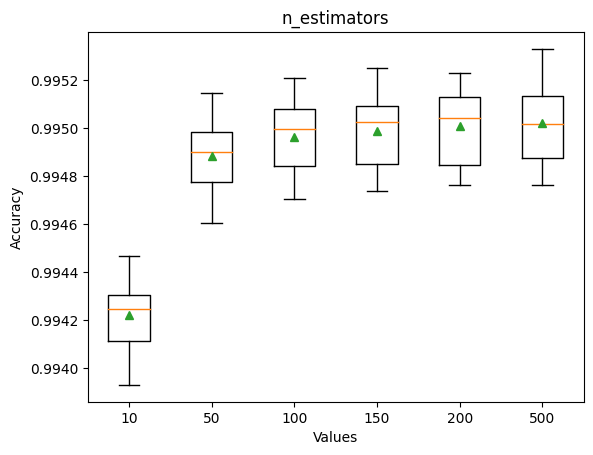

In [ ]:
#perform the hyper paramter tuning for n_trees
perform_hyperparameter_tuning('n_estimators',x_train, y_train)

In [ ]:
# get a list of models to evaluate number of features
def get_models():
 models = dict()
 # explore number of features from 1 to 40
 i_features =[1, 5, 10, 15, 20, 25, 30, 35, 40]
 for i in i_features:
  models[str(i)] = ExtraTreesClassifier(max_features=i, random_state=10)
 return models


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  2.9min remaining:  7.9min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  3.1min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>1 0.99470 (0.00014)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.3min remaining:  9.1min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  3.9min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>5 0.99476 (0.00015)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.4min remaining:  9.4min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  4.3min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>10 0.99489 (0.00016)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.6min remaining:  9.9min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  4.1min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>15 0.99500 (0.00015)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  4.1min remaining: 11.2min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  4.2min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>20 0.99506 (0.00017)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  4.0min remaining: 11.1min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  4.5min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>25 0.99507 (0.00013)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  4.6min remaining: 12.7min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  5.4min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>30 0.99512 (0.00016)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  5.0min remaining: 13.7min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  5.7min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>35 0.99514 (0.00015)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  5.2min remaining: 14.4min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  5.9min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.8min finished


>40 0.99518 (0.00015)


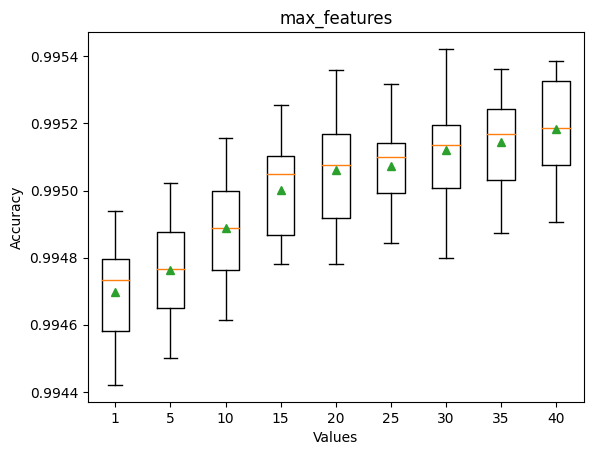

In [ ]:
#perform the hyper paramter tuning for number of features
perform_hyperparameter_tuning('max_features', x_train, y_train)

In [ ]:
# get a list of models to evaluate minimum samples per split
def get_models():
 models = dict()
 # explore the number of samples per split from 2 to 14
 for i in range(2, 15):
  models[str(i)] = ExtraTreesClassifier(min_samples_split=i, random_state=10)
 return models

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.7min remaining: 10.3min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  4.2min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>2 0.99496 (0.00015)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.7min remaining: 10.2min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  4.3min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>3 0.99494 (0.00015)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.5min remaining:  9.5min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  3.9min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>4 0.99491 (0.00014)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.8min remaining: 10.4min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  4.2min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>5 0.99487 (0.00014)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.6min remaining: 10.0min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  3.7min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>6 0.99483 (0.00016)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.5min remaining:  9.6min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  3.7min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>7 0.99478 (0.00016)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.6min remaining: 10.0min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  3.7min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>8 0.99473 (0.00015)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.5min remaining:  9.7min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  3.7min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>9 0.99467 (0.00016)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.5min remaining:  9.6min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  3.6min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>10 0.99462 (0.00015)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.4min remaining:  9.4min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  3.7min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>11 0.99456 (0.00016)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.6min remaining:  9.8min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  3.7min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>12 0.99454 (0.00015)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.6min remaining:  9.9min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  3.7min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


>13 0.99450 (0.00014)


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.6min remaining:  9.8min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  3.7min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.2min finished


>14 0.99447 (0.00016)


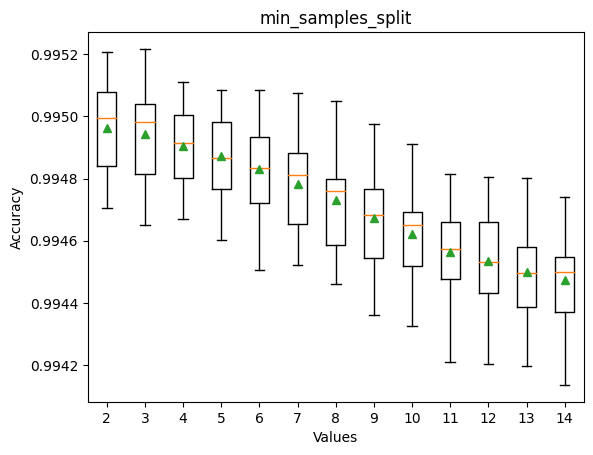

In [ ]:
#perform the hyper paramter tuning for minimum samples per split
perform_hyperparameter_tuning('min_samples_split', x_train, y_train)